# Fetal Health Classification 
### Author: Diane Tunnicliffe

## Overview
"Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more."



## Business Problem

Preventative care. Pitch to doctors. To decrease the risk of preventable fetal and maternal mortality, I will be answering the question of how to predict fetal health outcomes based on CTG data. This information can be used by medical professionals, specifically in the field of obstetrics, to minimize the occurrence of fetal mortality. While this is arguably more of a health problem than a business problem, medical practices can benefit greatly from these findings by ensuring the best possible patient health.  

"The magnitude of fetal mortality is considerable: About 1 million fetal deaths occur at any gestational age in the United States each year, including almost 26,000 at 20 weeks of gestation or more; Even when limited to fetal deaths of 20 weeks of gestation or more, nearly as many fetal deaths as infant deaths occur in the United States each year; After decades of decline, the U.S. fetal mortality rate (fetal deaths of 20 weeks of gestation or more) did not decrease from 2003 to 2005; Fetal mortality rates are substantially higher for non-Hispanic black and American Indian or Alaska Native women than for non-Hispanic white women; Compared with the U.S. average, fetal mortality rates are higher for teenagers and for women aged 35 years and over, for twin and higher-order pregnancies, and for women with more than two previous pregnancies. Fetal mortality is a major, but often overlooked, public health problem. Fetal mortality refers to spontaneous intrauterine death at any time during pregnancy. "

### Hypotheses  

Null hypothesis (H0): There is no relationship between automated CTG data and fetal health outcome.  
Alternative hypothesis (Ha): There is a relationship between automated CTG data and fetal health outcome. 

## Data Understanding
"Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress. The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more."  

The dataset used for this project can be found at https://www.kaggle.com/andrewmvd/fetal-health-classification. It contains 2,126 rows of 22 features extracted from Cardiotocogram (CTG) exams, which were then classified by three expert obstetritians into 3 classes:
* Normal
* Suspect 
* Pathological  


Citation: Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318. The original study can be found at https://onlinelibrary.wiley.com/doi/10.1002/1520-6661(200009/10)9:5%3C311::AID-MFM12%3E3.0.CO;2-9. 



In [170]:
# importing the packages we will be using for this project
import pandas as pd
# setting pandas display to avoid scientific notation in my dataframes
pd.options.display.float_format = '{:.3f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures, Binarizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import SelectPercentile
from tpot import TPOTClassifier
from tpot.export_utils import set_param_recursive
from xgboost import XGBClassifier


%matplotlib inline

In [129]:
# reading the csv file
df = pd.read_csv('data/fetal_health.csv')
# previewing the DataFrame
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.000,0.000,0.000,0.000,0.000,0.000,0.000,73.000,0.500,43.000,...,62.000,126.000,2.000,0.000,120.000,137.000,121.000,73.000,1.000,2.000
1,132.000,0.006,0.000,0.006,0.003,0.000,0.000,17.000,2.100,0.000,...,68.000,198.000,6.000,1.000,141.000,136.000,140.000,12.000,0.000,1.000
2,133.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.100,0.000,...,68.000,198.000,5.000,1.000,141.000,135.000,138.000,13.000,0.000,1.000
3,134.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,11.000,0.000,137.000,134.000,137.000,13.000,1.000,1.000
4,132.000,0.007,0.000,0.008,0.000,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,9.000,0.000,137.000,136.000,138.000,11.000,1.000,1.000


In [130]:
# getting info for DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [131]:
df.shape

(2126, 22)

In [132]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,...,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000
mean,133.304,0.003,0.009,0.004,0.002,0.000,0.000,46.990,1.333,9.847,...,93.579,164.025,4.068,0.324,137.452,134.611,138.090,18.808,0.320,1.304
std,9.841,0.004,0.047,0.003,0.003,0.000,0.001,17.193,0.883,18.397,...,29.560,17.944,2.949,0.706,16.381,15.594,14.467,28.978,0.611,0.614
min,106.000,0.000,0.000,0.000,0.000,0.000,0.000,12.000,0.200,0.000,...,50.000,122.000,0.000,0.000,60.000,73.000,77.000,0.000,-1.000,1.000
25%,126.000,0.000,0.000,0.002,0.000,0.000,0.000,32.000,0.700,0.000,...,67.000,152.000,2.000,0.000,129.000,125.000,129.000,2.000,0.000,1.000
50%,133.000,0.002,0.000,0.004,0.000,0.000,0.000,49.000,1.200,0.000,...,93.000,162.000,3.000,0.000,139.000,136.000,139.000,7.000,0.000,1.000
75%,140.000,0.006,0.003,0.007,0.003,0.000,0.000,61.000,1.700,11.000,...,120.000,174.000,6.000,0.000,148.000,145.000,148.000,24.000,1.000,1.000
max,160.000,0.019,0.481,0.015,0.015,0.001,0.005,87.000,7.000,91.000,...,159.000,238.000,18.000,10.000,187.000,182.000,186.000,269.000,1.000,3.000


In [133]:
# renaming baseline value column to make it easier to work with
df = df.rename(columns = {'baseline value':'baseline_value', 'prolongued_decelerations': 'prolonged_decelerations'})
df.columns

Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

The columns are described from the data source as follows: 

* baseline value - Baseline Fetal Heart Rate (FHR) (beats per minute)  
* accelerations - Number of accelerations per second  
* fetal_movement - Number of fetal movements per second  
* uterine_contractions - Number of uterine contractions per second  
* light_decelerations - Number of light decelerations per second  
* severe_decelerations - Number of severe decelerations per second  
* prolongued_decelerations - Number of prolonged decelerations per second  * abnormal_short_term_variability - Percentage of time with abnormal short-term variability  
* mean_value_of_short_term_variability - Mean value of short-term variability  
* percentage_of_time_with_abnormal_long_term_variability - Percentage of time with abnormal long-term variability  
* mean_value_of_long_term_variability - Mean value of long-term variability 
* histogram_width - Width of FHR histogram (generated from exam)  
* histogram_min - Minimum of FHR histogram (generated from exam)  
* histogram_max - Maximum of FHR histogram (generated from exam)  
* histogram_number_of_peaks - Number of FHR histogram peaks (generated from exam)  
* histogram_number_of_zeroes - Number of FHR histogram zeroes (generated from exam)  
* histogram_mode - Mode of FHR histogram (generated from exam)  
* histogram_mean - Mean of FHR histogram (generated from exam)  
* histogram_median - Median of FHR histogram (generated from exam)  
* histogram_variance - Variance of FHR histogram (generated from exam)  
* histogram_tendency - Tendency of FHR histogram (generated from exam)  
* fetal_health - Fetal health as assessed by expert obstetrician. 1 - Normal, 2 - Suspect, 3 - Pathological           

In [134]:
# getting value counts for fetal accelerations column
df.accelerations.value_counts()

0.000    894
0.003    161
0.002    160
0.001    143
0.004    117
0.006    112
0.005    110
0.008    103
0.007     91
0.009     60
0.010     50
0.011     36
0.012     24
0.013     22
0.014     20
0.015      9
0.016      7
0.017      4
0.018      2
0.019      1
Name: accelerations, dtype: int64

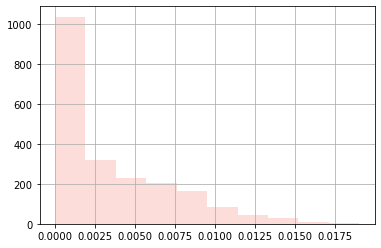

In [135]:
# plotting acceleration frequencies
sns.set_palette(palette='RdPu')
df.accelerations.hist();

The majority of observed fetal heart rate accelerations were 0.00. 

In [136]:
# getting value counts for fetal movement column
df.fetal_movement.value_counts()

0.000    1311
0.001     164
0.002     112
0.003      88
0.004      49
         ... 
0.340       1
0.383       1
0.092       1
0.032       1
0.306       1
Name: fetal_movement, Length: 102, dtype: int64

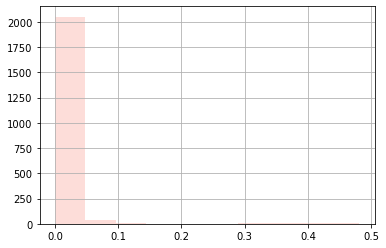

In [137]:
# plotting fetal movement frequencies
df.fetal_movement.hist();

The fetal movement value with the highest frequency is once again 0.00.

In [138]:
df.severe_decelerations.value_counts()

0.000    2119
0.001       7
Name: severe_decelerations, dtype: int64

There were only 7 observed severe decelerations in the dataset.

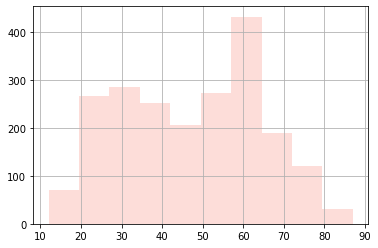

In [139]:
df.abnormal_short_term_variability.hist();

This column is a measure of the percentage of time with abnormal short-term variability. According to the American Academy of Family Physicians (AAFP.org), short-term variability of the fetal heart rate is defined as "the oscillation of the FHR around the baseline in amplitude of 5 to 10 bpm." In other words, it is normal and expected to have some variability of the fetal heart rate around the baseline. However, this column is a measure of the percentage of time that an abnormal variability was observed. Considering that most of the fetal health outcomes were normal, I found it surprising that there were quite a few records with high abnormal percentages of short-term variability.

In [140]:
df.histogram_width.describe()

count   2126.000
mean      70.446
std       38.956
min        3.000
25%       37.000
50%       67.500
75%      100.000
max      180.000
Name: histogram_width, dtype: float64

In [141]:
df.histogram_min.describe()

count   2126.000
mean      93.579
std       29.560
min       50.000
25%       67.000
50%       93.000
75%      120.000
max      159.000
Name: histogram_min, dtype: float64

In [142]:
df.histogram_max.describe()

count   2126.000
mean     164.025
std       17.944
min      122.000
25%      152.000
50%      162.000
75%      174.000
max      238.000
Name: histogram_max, dtype: float64

In [143]:
df.corr()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline_value,1.000,-0.081,-0.033,-0.146,-0.159,-0.054,-0.105,0.306,-0.280,0.286,...,0.362,0.275,-0.114,-0.005,0.709,0.723,0.789,-0.134,0.294,0.148
accelerations,-0.081,1.000,0.048,0.090,-0.109,-0.043,-0.128,-0.280,0.207,-0.374,...,-0.154,0.394,0.190,-0.006,0.244,0.270,0.273,0.126,0.028,-0.364
fetal_movement,-0.033,0.048,1.000,-0.069,0.049,-0.011,0.266,-0.104,0.121,-0.074,...,-0.154,0.100,0.165,-0.018,-0.061,-0.090,-0.072,0.179,-0.002,0.088
uterine_contractions,-0.146,0.090,-0.069,1.000,0.285,0.007,0.077,-0.233,0.290,-0.307,...,-0.113,0.123,0.083,0.058,-0.105,-0.188,-0.140,0.239,-0.072,-0.205
light_decelerations,-0.159,-0.109,0.049,0.285,1.000,0.108,0.226,-0.119,0.562,-0.271,...,-0.554,0.218,0.398,0.235,-0.347,-0.527,-0.389,0.564,0.000,0.059
severe_decelerations,-0.054,-0.043,-0.011,0.007,0.108,1.000,0.012,0.034,0.034,-0.031,...,-0.072,-0.021,0.007,0.043,-0.215,-0.159,-0.160,0.136,-0.070,0.132
prolonged_decelerations,-0.105,-0.128,0.266,0.077,0.226,0.012,1.000,0.046,0.267,-0.137,...,-0.277,0.120,0.223,0.056,-0.436,-0.489,-0.445,0.503,-0.215,0.485
abnormal_short_term_variability,0.306,-0.280,-0.104,-0.233,-0.119,0.034,0.046,1.000,-0.431,0.459,...,0.275,-0.112,-0.168,-0.149,0.058,0.075,0.120,-0.146,-0.006,0.471
mean_value_of_short_term_variability,-0.280,0.207,0.121,0.290,0.562,0.034,0.267,-0.431,1.000,-0.470,...,-0.623,0.409,0.501,0.266,-0.308,-0.445,-0.336,0.556,-0.066,-0.103
percentage_of_time_with_abnormal_long_term_variability,0.286,-0.374,-0.074,-0.307,-0.271,-0.031,-0.137,0.459,-0.470,1.000,...,0.423,-0.283,-0.279,-0.122,0.165,0.222,0.186,-0.282,0.042,0.426


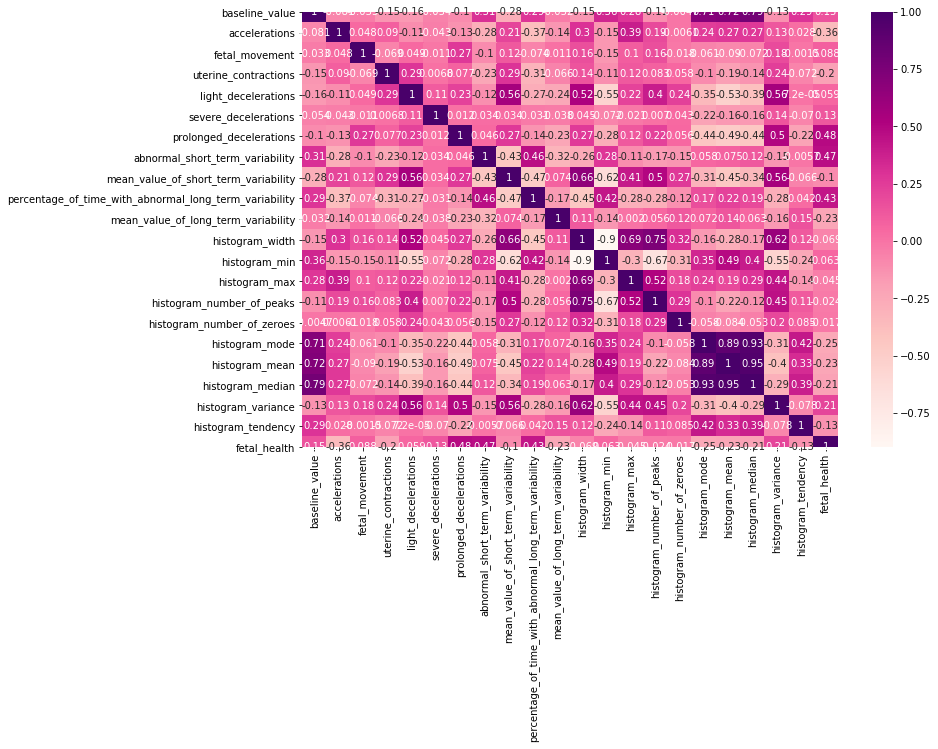

In [144]:
# generate heatmap to display correlations in data
corr = df.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="RdPu");

The feature showing the strongest correlation with fetal health is prolonged decelerations, with a correlation of 0.485. There are moderate correlations also observed between fetal health and abnormal short term variability, as well as fetal health and percentage of time with abnormal long term variability. 

In [145]:
# examining the relationship between prolonged decelerations and fetal health
# sns.swarmplot('prolonged_decelerations','fetal_health', data=df)
# plt.tight_layout();

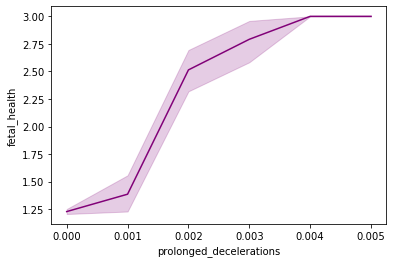

In [146]:
sns.set_palette(palette='RdPu_r')
sns.lineplot('prolonged_decelerations','fetal_health', data=df, alpha=1.0);

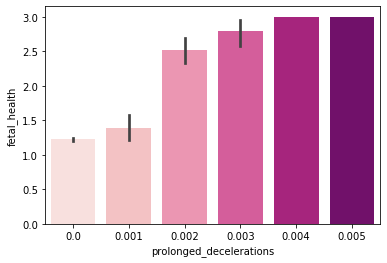

In [147]:
sns.set_palette(palette='RdPu')
sns.barplot('prolonged_decelerations','fetal_health', data=df);

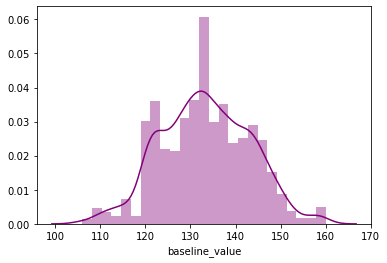

In [148]:
sns.set_palette(palette='RdPu_r')
sns.distplot(df['baseline_value']);

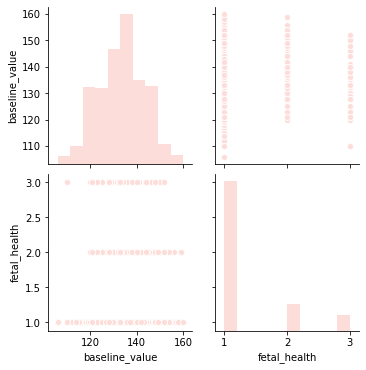

In [149]:
sns.set_palette(palette='RdPu')
sns.pairplot(df[['baseline_value', 'fetal_health']]);

## Data Preparation

In [150]:
# checking for null values
df.isnull().sum()

baseline_value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolonged_decelerations                                   0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

This dataset had no null values to be dealt with.

In [151]:
# checking value counts for target variable
df.fetal_health.value_counts()

1.000    1655
2.000     295
3.000     176
Name: fetal_health, dtype: int64

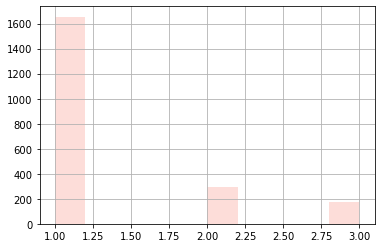

In [152]:
# plotting target variable frequencies
df.fetal_health.hist();

### Feature Engineering
The target class, fetal health, is very unbalanced. The majority of the fetal health outcomes observed in this dataset are 1.00, which is the designation for Normal fetal health. The class with the second-highest frequency is the 2.00 or Suspect fetal health class. The class with the lowest frequency in this dataset is 3.00 or Pathological fetal health.  
To make the data slightly easier to work with and understand, and turn this into a binary classification problem, I combined the 2.00 and 3.00 classes of Suspect and Pathological fetal health into a category called At Risk. I designated all the values of 1.00 as Normal.

In [153]:
# engineering new categorical target column for Normal and At Risk fetal health
df.loc[df['fetal_health']==1.000, 'fh_outcome'] = 'Normal'
df.loc[df['fetal_health']==2.000, 'fh_outcome'] = 'At Risk'
df.loc[df['fetal_health']==3.000, 'fh_outcome'] = 'At Risk'

I then removed the original fetal_health column from the dataframe.

In [154]:
df = df.drop(columns='fetal_health', axis=1)

In [155]:
df.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fh_outcome
0,120.000,0.000,0.000,0.000,0.000,0.000,0.000,73.000,0.500,43.000,...,62.000,126.000,2.000,0.000,120.000,137.000,121.000,73.000,1.000,At Risk
1,132.000,0.006,0.000,0.006,0.003,0.000,0.000,17.000,2.100,0.000,...,68.000,198.000,6.000,1.000,141.000,136.000,140.000,12.000,0.000,Normal
2,133.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.100,0.000,...,68.000,198.000,5.000,1.000,141.000,135.000,138.000,13.000,0.000,Normal
3,134.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,11.000,0.000,137.000,134.000,137.000,13.000,1.000,Normal
4,132.000,0.007,0.000,0.008,0.000,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,9.000,0.000,137.000,136.000,138.000,11.000,1.000,Normal


In [156]:
df.fh_outcome.value_counts()

Normal     1655
At Risk     471
Name: fh_outcome, dtype: int64

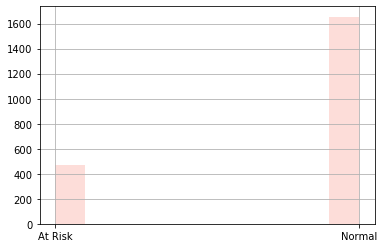

In [157]:
df.fh_outcome.hist();

This is still very unbalanced, but is somewhat more straightforward.

### Encoding

In [158]:
df.dtypes

baseline_value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolonged_decelerations                                   float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

Every feature in the CTG data was already numerical (float) so there was not much encoding necessary, aside from the target variable. With that being said, I opted to tackle the encoding of the target variable using pd.get_dummies along with manual column dropping to ensure that I could control which class was considered positive (1) and which class was considered negative (0) in the evaluation stage.

In [159]:
# generate binary values using get_dummies
dum_df = pd.get_dummies(df, columns=['fh_outcome'])
# merge with main df
df = df.drop(columns=['fh_outcome'], axis=1)
df = pd.concat([df, dum_df], axis=1)
df.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fh_outcome_At Risk,fh_outcome_Normal
0,120.000,0.000,0.000,0.000,0.000,0.000,0.000,73.000,0.500,43.000,...,126.000,2.000,0.000,120.000,137.000,121.000,73.000,1.000,1,0
1,132.000,0.006,0.000,0.006,0.003,0.000,0.000,17.000,2.100,0.000,...,198.000,6.000,1.000,141.000,136.000,140.000,12.000,0.000,0,1
2,133.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.100,0.000,...,198.000,5.000,1.000,141.000,135.000,138.000,13.000,0.000,0,1
3,134.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.400,0.000,...,170.000,11.000,0.000,137.000,134.000,137.000,13.000,1.000,0,1
4,132.000,0.007,0.000,0.008,0.000,0.000,0.000,16.000,2.400,0.000,...,170.000,9.000,0.000,137.000,136.000,138.000,11.000,1.000,0,1


In [160]:
df = df.drop(columns=['fh_outcome_Normal'], axis=1)
df.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fh_outcome_At Risk
0,120.000,0.000,0.000,0.000,0.000,0.000,0.000,73.000,0.500,43.000,...,62.000,126.000,2.000,0.000,120.000,137.000,121.000,73.000,1.000,1
1,132.000,0.006,0.000,0.006,0.003,0.000,0.000,17.000,2.100,0.000,...,68.000,198.000,6.000,1.000,141.000,136.000,140.000,12.000,0.000,0
2,133.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.100,0.000,...,68.000,198.000,5.000,1.000,141.000,135.000,138.000,13.000,0.000,0
3,134.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,11.000,0.000,137.000,134.000,137.000,13.000,1.000,0
4,132.000,0.007,0.000,0.008,0.000,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,9.000,0.000,137.000,136.000,138.000,11.000,1.000,0


In [161]:
df['fh_outcome_At Risk'].value_counts()

0    1655
1     471
Name: fh_outcome_At Risk, dtype: int64

In [162]:
df = df.rename(columns={'fh_outcome_At Risk':'target'})
df.target.value_counts()

0    1655
1     471
Name: target, dtype: int64

## Modeling

### Baseline Model

I began with a baseline "vanilla" model. I used a Decision Tree since they are known to work well with imbalanced data, such as my target fetal health variable. 

In [191]:
# setting target and features
y = df['target']
X = df.drop(columns='target')

# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [192]:
# instantiating and fitting decision tree model
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [193]:
y_pred = tree_clf.predict(X_test)

# confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Recall score: ',recall_score(y_test, y_pred))

[[482  15]
 [ 32 109]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       497
           1       0.88      0.77      0.82       141

    accuracy                           0.93       638
   macro avg       0.91      0.87      0.89       638
weighted avg       0.92      0.93      0.92       638

Recall score:  0.7730496453900709


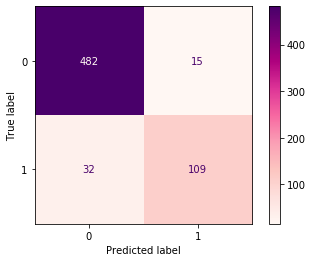

In [194]:
# plotting confusion matrix
plot_confusion_matrix(tree_clf, X_test, y_test,cmap="RdPu")
plt.show()

While an accuracy of 93% sounds like a good metric, it is important to note that this model missed 32 members of the at-risk fetal health class. Since we are dealing with the health outcomes and lives of babies, this is simply not acceptable. I will be evaluating my models with a focus on recall/sensitivity in order to minimize false negatives or Type II errors. In this case, the baseline recall value is 77%.

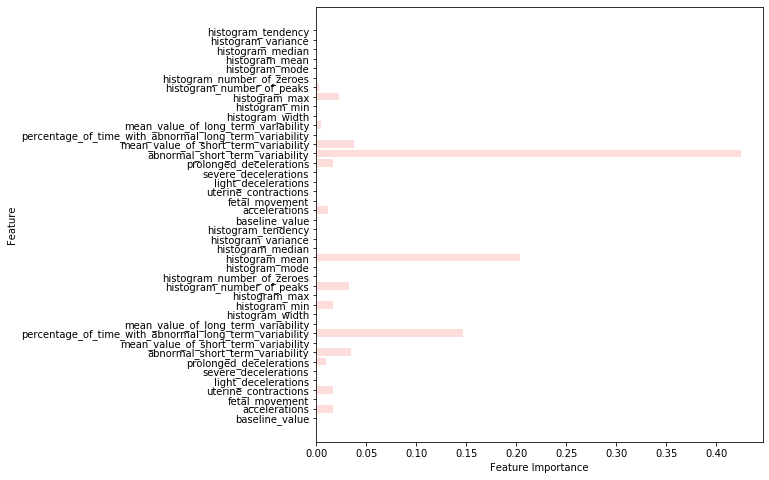

In [168]:
# plotting feature importances
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

The baseline decision tree model has allotted the most importance to abnormal short-term and long-term variability of fetal heart rate, as well as CTG histogram mean. Given the strong correlations noted earlier, it is not surprising that the classifier prioritized these particular features.

### Dealing With Imbalanced Classes

As explored previously, the fetal health outcome classes are quite imbalanced, with the majority being the negative (normal health) class. To address this, I once again ran the baseline decision tree model, but with the class_weight parameter set to "balanced". This adjusts so total weights are equal accross classes; in other words, members of the negative (normal health) class will be given less weight than members of the positive (at-risk) class. I opted to address this imbalance in this way so as not to sacrifice any data (as occurs in undersampling) or overfit to any duplicates from oversampling.

In [195]:
# instantiating and fitting decision tree model
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, class_weight='balanced', random_state=42) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [196]:
y_pred = tree_clf.predict(X_test)

# confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Recall score: ',recall_score(y_test, y_pred))

[[463  34]
 [ 23 118]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       497
           1       0.78      0.84      0.81       141

    accuracy                           0.91       638
   macro avg       0.86      0.88      0.87       638
weighted avg       0.91      0.91      0.91       638

Recall score:  0.8368794326241135


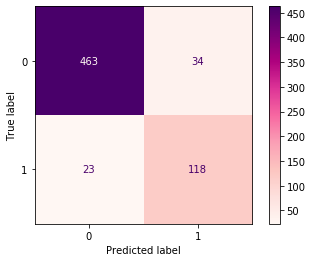

In [197]:
# plotting confusion matrix
plot_confusion_matrix(tree_clf, X_test, y_test,cmap="RdPu")
plt.show()

After balancing the class weights, the model has been improved to a recall value of 84%. But it still missed 23 of the at-risk class, so it requires further improvement.

### Exploring Models With Pipelines & Grid Search
#### Preparing Functions and Generic Parameters
Now that I had my baseline model with which to compare future iterations, I opted to streamline the modeling process with sklearn pipelines and GridSearchCV to help choose the best hyperparamters for optimized recall. I began by writing a function to create a pipeline given a classifier.

In [203]:
# function to make a pipeline with classifier input
def pipe_maker(classifier):
    pipe = Pipeline([('scl', StandardScaler()),
                    ('clf', classifier(class_weight= 'balanced', random_state=42))])
    return pipe

I then wrote a function to create a grid search using a pipeline and predetermined paramaters.

In [224]:
# function to create a grid search containing pipeline
def gridsearch_maker(pipeline, params):
    return GridSearchCV(estimator=pipeline,
                        param_grid=params,
                        scoring='recall',
                        cv=10,
                        n_jobs=-1)

In [225]:
# setting generic grid search parameters
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_small = [1.0, 0.5, 0.1]

I then wrote a function to find the best hyperparameters to optimize recall for a given model, print the classification report for the model with the best parameters, and print the confusion matrix for this model as well.

In [226]:
def find_best_recall(gridsearch):
    """ 
    Runs a grid search iterating through predefined grid params and returns best params to optimize recall score. 
  
    Fits classifier to X_train and y_train.
    Determines and prints best params for recall.
    Determines and prints best training set recall.
    Predicts on test data using best params.
    Prints best test set recall.
    Prints classification report for best model.
    Plots confusion matrix for best model.
  
    Parameters: 
    gridsearch: Predefined instance of GridsearchCV with parameters and estimator/pipeline already set.
  
    Returns: 
    Best parameters for particular grid search, based on recall score.
    Best training set recall.
    Best test set recall.
    Classification report for best model.
    Confusion matrix for best model.
  
    """
    # fitting the grid search objects
    best_recall = 0.0
    # fitting grid search
    gridsearch.fit(X_train, y_train)
    # best params
    print('Best params: %s' % gridsearch.best_params_)
    # best training data recall
    print('Best training recall: %.3f' % gridsearch.best_score_)
    # predict on test data with best params
    y_pred = gridsearch.predict(X_test)
    # test data recall with best params
    print('Test set recall score for best params: %.3f ' % recall_score(y_test, y_pred))
    # confusion matrix and classification report
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('Recall score: ',recall_score(y_test, y_pred))
    # plotting confusion matrix
    plot_confusion_matrix(gridsearch, X_test, y_test,cmap="RdPu")
    plt.show()

#### Applying Functions to Create Models

I began with fitting a logistic regression model, optimized with a pipeline and grid search.

Best params: {'clf__C': 0.1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training recall: 0.927
Test set recall score for best params: 0.922 
[[419  78]
 [ 11 130]]
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       497
           1       0.62      0.92      0.74       141

    accuracy                           0.86       638
   macro avg       0.80      0.88      0.82       638
weighted avg       0.90      0.86      0.87       638

Recall score:  0.9219858156028369


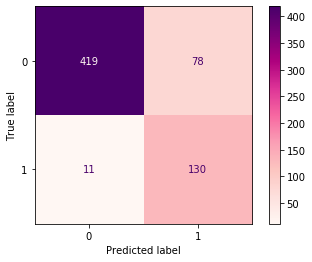

In [227]:
# fitting Logistic Regression pipeline
pipe_lr = pipe_maker(LogisticRegression)

# setting grid search parameters
grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
                   'clf__C': param_range_small,
                   'clf__solver': ['liblinear']}]

# creating grid search object
gs_lr = gridsearch_maker(pipe_lr, grid_params_lr)

# finding best parameters for recall
find_best_recall(gs_lr)

According to my grid search, a logistic regression model with best parameters was good, with a best recall score of 92%.

In [222]:
# fitting Random Forest pipeline
pipe_rf = pipe_maker(RandomForestClassifier)

# setting grid search parameters
grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': param_range,
                   'clf__max_depth': param_range,
                   'clf__min_samples_split': param_range[1:]}]

# creating grid search object
gs_rf = gridsearch_maker(pipe_rf, grid_params_rf)

# finding best parameters for recall
find_best_recall(gs_rf)

Best params: {'clf__criterion': 'gini', 'clf__max_depth': 6, 'clf__min_samples_leaf': 9, 'clf__min_samples_split': 2}
Best training recall: 0.918
Test set recall score for best params: 0.936 


In [ ]:
# fitting Support Vector Machine pipeline
pipe_svm = pipe_maker(svm.SVC)

# setting grid search parameters
grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
                    'clf__C': param_range}]

# creating grid search object
gs_svm = gridsearch_maker(pipe_svm, grid_params_svm)

# finding best parameters for recall
find_best_recall(gs_svm)

In [ ]:
# fitting Extra Trees pipeline
pipe_et = pipe_maker(ExtraTreesClassifier)

# setting grid search parameters
grid_params_et = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': param_range,
                   'clf__max_depth': param_range,
                   'clf__min_samples_split': param_range[1:]}]

# creating grid search object
gs_et = gridsearch_maker(pipe_et, grid_params_et)

# finding best parameters for recall
find_best_recall(gs_et)

Based on my pipelines and grid searches, my best model uses the SVM algorithm with RBF kernel and a C of 7. RBF kernel (Radial Basis Function) helps to create clusters that are close together in a higher-dimensional space, with the hope that these clusters will be linearly separable. A lower C value leads to more regularization and more penalty for higher coefficients. A higher C value is the opposite.  

While 88% recall on the test set is good, it is not quite as good as what I was hoping for, which is recall of 100%. My next iterations will leverage the ExtraTrees and XGboost algorithms.

#### AutoML with TPOT
My last iteration will utilize TPOT for automated model selection and hyperparameter tuning. "TPOT is a Python tool which automatically creates and optimizes machine learning pipelines using genetic programming. TPOT works in tandem with Scikit-learn, describing itself as a Scikit-learn wrapper. TPOT is open source, written in Python, and aimed at simplifying a machine learning process by way of an AutoML approach based on genetic programming. The end result is automated hyperparameter selection, modeling with a variety of algorithms, and exploration of numerous feature representations, all leading to iterative model building and model evaluation."

In [ ]:
# constructing and fitting TPOT classifier
tpot = TPOTClassifier(template ='Selector-Transformer-Classifier', generations=10, verbosity=1, scoring='recall', random_state=42)
tpot.fit(X_train, y_train)

# saving best pipeline as Python script file
tpot.export('tpot_best_pipeline.py')

Best pipeline: BernoulliNB(RobustScaler(SelectPercentile(input_matrix, percentile=27)), alpha=100.0, fit_prior=False)

In [173]:
# Average CV score on the training set was: 0.9361305361305362
exported_pipeline = make_pipeline(
    SelectPercentile(percentile=27),
    RobustScaler(),
    BernoulliNB(alpha=100.0, fit_prior=False)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)

In [174]:
# confusion matrix and classification report
print(confusion_matrix(y_test, results))
print(classification_report(y_test, results))
print('Recall score: ',recall_score(y_test, results))
print('Accuracy score: ',accuracy_score(y_test, results))
print('F1 score: ',f1_score(y_test, results))

[[357 139]
 [  4 138]]
              precision    recall  f1-score   support

           0       0.99      0.72      0.83       496
           1       0.50      0.97      0.66       142

    accuracy                           0.78       638
   macro avg       0.74      0.85      0.75       638
weighted avg       0.88      0.78      0.79       638

Recall score:  0.971830985915493
Accuracy score:  0.7758620689655172
F1 score:  0.6587112171837708


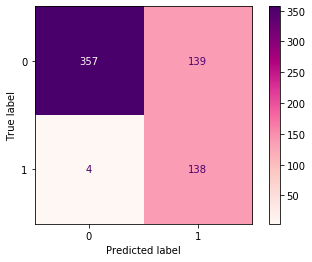

In [175]:
# plotting confusion matrix
plot_confusion_matrix(exported_pipeline, X_test, y_test,
                     cmap='RdPu')
plt.show()

This model that was decided upon using TPOT has a recall score of 97% and only missed 4 of the At Risk class. This is the best model so far. It is based on the Bernoulli Naive Bayes algorithm.

## Evaluation and Results

The positive class for fetal health is 'At Risk' and the negative class is 'Normal'. The objective is to minimize false negatives and err on the side of caution. Better safe than sorry! Being overly cautious is the ethical course of action when dealing with maternal-fetal health. Misclassifying a member of the 'Normal' class as 'At Risk' is a minor inconvenience (and likely a scare for the mother), but misclassifying a member of the 'At Risk' class as 'Normal' has far more serious consequences. I want to make sure that we catch every single baby that is in distress so that decisions can be made accordingly. Therefore, I will be prioritizing Recall/Sensitivity as the metric by which to evaluate the models. This will ensure that we capture all instances of the positive class, which makes this the most important metric for the problem at hand. By doing this, I will avoid false negatives or Type II errors.  
That being said, my best model was the one using Bernoulli Naive Bayes algorithm with auto hyperparamter selection using TPOT. This model achieved a recall score of 97%. It is important to note that while there is a trade-off between recall and precision, and therefore accuracy, you simply cannot put a price on a human life. So I have chosen to prioritize recall at the expense of all other metrics for this particular problem.  
Based on the recall/sensitivity rate of 97%, I reject the null hypothesis that there is no relationship between automated CTG data and fetal health outcome.

## Recommendations

1. Since I have shown that automated CTG data provides an ability to predict if a fetus in-utero is in distress with a recall/sensitivity rate of 97%, my main recommendation is that CTGs be performed as often as possible on expectant mothers. This is an easy and highly interpretable way to maintain the necessary level of care to preserve maternal and fetal health. It has been posed by obstetricians as a cost-effective option for achieving the goal of reducing maternal and fetal mortality, and based on my findings, cardiotocogram readings are correlated with with fetal health outcome. 
2. I recommend that the CTG data be evaluated by both machine learning algorithms and actual obstetricians, to maximize the predictive power of the data.
3. I recommend that any indication of at-risk fetal health be treated immediately and with great care, to maximize maternal and fetal health outcomes. Even if it is a false alarm, it is always better to be safe than sorry when it comes to fetal health.
4. Finally, when it comes to the actual CTG data, I recommend that doctors and future ML models pay particularly close attention to the percentage of time with both short- and long-term variability in fetal heart rate (FHR) to maximize fetal health. These indicators were the two strongest indicators for at-risk outcomes. 

## Conclusion

In conclusion, cardiotocogram data provides easily accessible and interpretable insight into fetal health outcomes. ML models are able to predict if a fetus is in distress, using CTG data, with a high level of recall/sensitivity. Between the high predictive power of these models and the expert knowledge of obstetricians, fetal and maternal health could and should be prioritized. By doing this, yearly fetal mortality rates can be effectively reduced.

In [202]:
pipe_lr = pipe_maker(LogisticRegression)

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
                   'clf__C': param_range_small,
                   'clf__solver': ['liblinear']}]

gs_lr = GridSearchCV(estimator=pipe_lr,
                     param_grid=grid_params_lr,
                     scoring='recall',
                     cv=10) 

Pipeline(steps=[('scl', StandardScaler()),
                ('clf',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [169]:
# building pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=42))])

pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(random_state=42))])

pipe_svm = Pipeline([('scl', StandardScaler()),
                     ('clf', svm.SVC(random_state=42))])


# setting grid search parameters
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_small = [1.0, 0.5, 0.1]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
                   'clf__C': param_range_small,
                   'clf__solver': ['liblinear']}] 

grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': param_range,
                   'clf__max_depth': param_range,
                   'clf__min_samples_split': param_range[1:]}]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
                    'clf__C': param_range}]

# setting grid searches
jobs = -1

gs_lr = GridSearchCV(estimator=pipe_lr,
                     param_grid=grid_params_lr,
                     scoring='recall',
                     cv=10) 

gs_rf = GridSearchCV(estimator=pipe_rf,
                     param_grid=grid_params_rf,
                     scoring='recall',
                     cv=10, 
                     n_jobs=jobs)

gs_svm = GridSearchCV(estimator=pipe_svm,
                      param_grid=grid_params_svm,
                      scoring='recall',
                      cv=10,
                      n_jobs=jobs)

# list of pipelines for ease of iteration
grids = [gs_lr, gs_rf, gs_svm]

# dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'Random Forest', 
             2: 'Support Vector Machine'}

# fitting the grid search objects
print('Performing model optimizations...')
best_recall = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    # Fit grid search
    gs.fit(X_train, y_train)
    # Best params
    print('Best params: %s' % gs.best_params_)
    # Best training data recall
    print('Best training recall: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data recall of model with best params
    print('Test set recall score for best params: %.3f ' % recall_score(y_test, y_pred))
    # Track best (highest test recall) model
    if recall_score(y_test, y_pred) > best_recall:
        best_recall = recall_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set recall: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: Logistic Regression
Best params: {'clf__C': 0.5, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training recall: 0.781
Test set recall score for best params: 0.824 

Estimator: Random Forest
Best params: {'clf__criterion': 'entropy', 'clf__max_depth': 10, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2}
Best training recall: 0.842
Test set recall score for best params: 0.859 

Estimator: Support Vector Machine
Best params: {'clf__C': 7, 'clf__kernel': 'rbf'}
Best training recall: 0.827
Test set recall score for best params: 0.880 

Classifier with best test set recall: Support Vector Machine


In [294]:
# save the best pipeline
filename = 'best_pipeline.pkl'
pickle.dump(best_gs, open(filename, 'wb'))

In [295]:
# Load from file
with open(filename, 'rb') as file:
    pickled_pipeline = pickle.load(file)

In [296]:
pickled_pipeline

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('clf', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'clf__kernel': ['linear', 'rbf']}],
             scoring='recall')

Classifier with best test set recall: Support Vector Machine  
Estimator: Support Vector Machine  
Best params: {'clf__C': 7, 'clf__kernel': 'rbf'}  
Best training recall: 0.827  
Test set recall score for best params: 0.880

In [76]:
best_pipeline = make_pipeline(
    StandardScaler(),
    SVC(C=7, kernel='rbf', random_state=42)
)

best_pipeline.fit(X_train, y_train)
results = best_pipeline.predict(X_test)

In [77]:
# confusion matrix and classification report
print(confusion_matrix(y_test, results))
print(classification_report(y_test, results))
print('Recall score: ',recall_score(y_test, results))
print('Accuracy score: ',accuracy_score(y_test, results))
print('F1 score: ',f1_score(y_test, results))

[[469  27]
 [ 17 125]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       496
           1       0.82      0.88      0.85       142

    accuracy                           0.93       638
   macro avg       0.89      0.91      0.90       638
weighted avg       0.93      0.93      0.93       638

Recall score:  0.8802816901408451
Accuracy score:  0.9310344827586207
F1 score:  0.8503401360544218


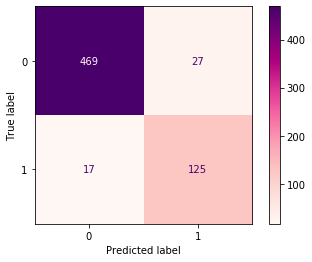

In [78]:
# Visualize confusion matrix
plot_confusion_matrix(best_pipeline, X_test, y_test,cmap="RdPu")
plt.show()

In [181]:
# building pipeline
pipe_et = Pipeline([('scl', StandardScaler()),
                    ('clf', ExtraTreesClassifier(random_state=42))])

# setting params for gridsearch
grid_params_et = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': param_range,
                   'clf__max_depth': param_range,
                   'clf__min_samples_split': param_range[1:]}]

# defining gridsearch
gs_et = GridSearchCV(estimator=pipe_et,
                     param_grid=grid_params_et,
                     scoring='recall',
                     cv=10, 
                     n_jobs=jobs)

In [182]:
find_best_recall(gs_et)

Best params: {'clf__criterion': 'entropy', 'clf__max_depth': 10, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
Best training recall: 0.790
Test set recall score for best params: 0.803 


In [172]:
# building pipeline
pipe_et = Pipeline([('scl', StandardScaler()),
                    ('clf', ExtraTreesClassifier(random_state=42))])

pipe_xg = Pipeline([('scl', StandardScaler()),
                     ('clf', XGBClassifier(random_state=42))])


# setting grid search parameters
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_small = [1.0, 0.5, 0.1]
 

grid_params_et = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': param_range,
                   'clf__max_depth': param_range,
                   'clf__min_samples_split': param_range[1:]}]

grid_params_xg = [{'clf__eta': param_range_small,
                   'clf__gamma': param_range,
                   'clf__max_depth': param_range,
                   'clf__min_child_weight': param_range,
                   'clf__max_delta_step': param_range,
                   'clf__subsample': param_range_small}]


# setting grid searches
jobs = -1


gs_et = GridSearchCV(estimator=pipe_et,
                     param_grid=grid_params_et,
                     scoring='recall',
                     cv=10, 
                     n_jobs=jobs)

gs_xg = GridSearchCV(estimator=pipe_xg,
                      param_grid=grid_params_xg,
                      scoring='recall',
                      cv=10,
                      n_jobs=jobs)

# list of pipelines for ease of iteration
grids = [gs_et, gs_xg]

# dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Extra Trees', 
             1: 'XGBoost'}

# fitting the grid search objects
print('Performing model optimizations...')
best_recall = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    # Fit grid search
    gs.fit(X_train, y_train)
    # Best params
    print('Best params: %s' % gs.best_params_)
    # Best training data recall
    print('Best training recall: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data recall of model with best params
    print('Test set recall score for best params: %.3f ' % recall_score(y_test, y_pred))
    # Track best (highest test recall) model
    if recall_score(y_test, y_pred) > best_recall:
        best_recall = recall_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set recall: %s' % grid_dict[best_clf])

Peetorming model optimizations...

Estimator: Extra Trees
Best params: {'clf__criterion': 'entropy', 'clf__max_depth': 10, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
Best training recall: 0.790
Test set recall score for best params: 0.803 

Estimator: XGBoost


/Users/dtunnicliffe/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  category=UserWarning
/Users/dtunnicliffe/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


AttributeError: dlsym(0x7fcad81fb750, XGDMatrixSetDenseInfo): symbol not found